# Final Data Science Project
## By: Sebastian Tucker-Kyriakos

In [405]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

In [596]:
# importing data
file_name = 'Data/train.csv'
DF = pd.read_csv(file_name)
show(DF)

## Questions: 

### Questions 1: Which Variables Have the Greatest Effect on Depression

In [346]:
DF.groupby(['Study Satisfaction', 'Depression']).size().reset_index(name='count')

,Study Satisfaction,Depression,count
0,1.0,0,1594
1,1.0,1,3857
2,2.0,0,2071
3,2.0,1,3769
4,3.0,0,2469
5,3.0,1,3354
6,4.0,0,3095
7,4.0,1,3265
8,5.0,0,2334
9,5.0,1,2089


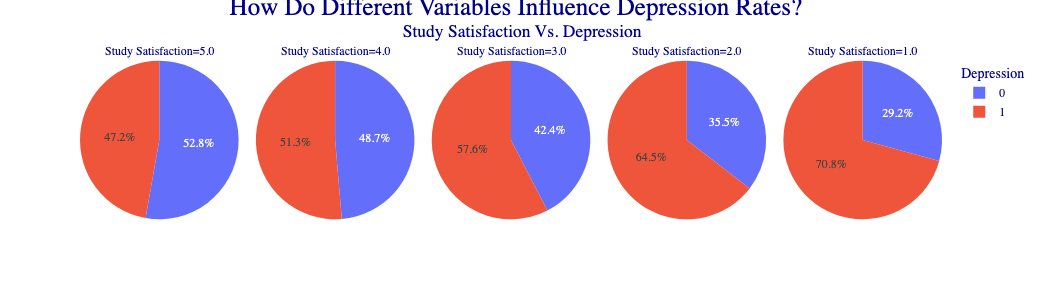

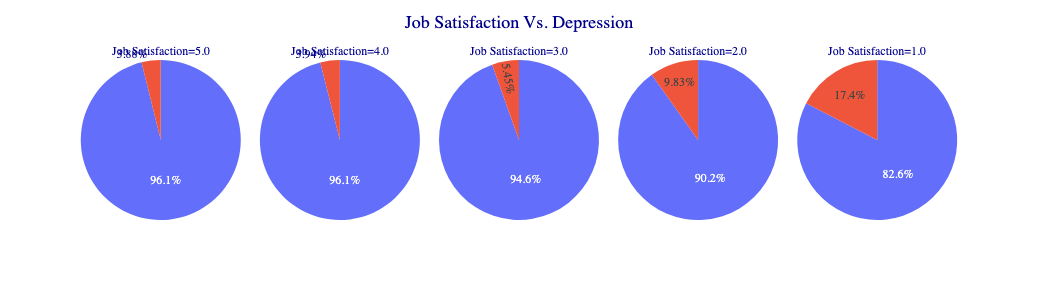

In [650]:
# This code creates two collections of pie charts, each with five pie charts. Each collection checks the relationship with the
# rate of depression with a different variable. The first looks at study satisfaction vs depression, and the second looks at
# work satisfaction vs depression.

# both collections use very similar code in order to make. The only real difference between the two are the labels and the data

# this creates the data frame that will be used for the first set of pie chartss
# It creates a data frame and sets it to DF, after applyinga lot of functions to it. 
# first of all, it only picks out the 'Study Satisfaction' and 'Depression' columns, since that's all we're using. It looks at 
# the .value_counts for these two columns, meaning it returns the unique combinations for it. The next part, 
# being the ".reset_index(name='count')", converts this into a data frame with 'count' as the name for the column with the
# frequency of each combination. Finally, .sort_values(by='Study Satisfaction', ascending=False) sorts the values using the 
# study satisfaction column, with it not being ascending.
DF_Depression_Influence = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=False)
) 
# creating the pi chart and using the new data frame we just made.
fig1 = px.pie(DF_Depression_Influence, 
# the values are the frequency which lets us see the ratio
    values='count', 
# names is set to depression for the legend
    names = 'Depression',
# facet column is study satisfaction to seperate the pie charts into the different levels of study satisfaction
    facet_col='Study Satisfaction',
# color is also depression in order to actually see the ratio
    color = 'Depression',
# this is to make sure that depression is the red color on the left and goes around counter clcock
    category_orders={'Depression' : [0,1]},
    
)


fig1.update_layout( # update layout
    template='ggplot2', # setting template for visuals
                  legend_title='Depression', # title of the legend
                  width=900, #width
                  height=300,# Hight

    title={ # indicates that I will be customizing the title
        'font': dict(size=25),# font size
# two titles in one. The first one is the bigger title that titles the whole ten pi charts and uses "<br>" to make it a large title,
# meanwhile the "<sup>" is sued in order to make the smaller title below it that only labels the top five pi charts
        'text': "How Do Different Variables Influence Depression Rates? <br> <sup>Study Satisfaction Vs. Depression<sup>",
        'x': 0.5,  # center the title horizontally
        'y': 0.95,  # adjust vertical position
        'xanchor': 'center',  # anchor horizontally
        'yanchor': 'top',  # anchor vertically
         
    },
    font={'family':"Times",'size':12,'color':"Darkblue"} # font color
                      )

fig1.show() # showing final result

# below is the second set of pi charts, most of the information is the same except for a couple of changes

# i used the same variable as before, however it was changed to fit the second set of pie charts.
DF_Depression_Influence = (
# firstly, the variable I choose to compare to depression rates is different. Before it was Study Satisfaction, now it is Job 
# Satisfaction. It is also sorted by Job Satisfaction in order to see the five different levels of satisfaction from 1-5 and 
# how depression rates look at each level, just like with the previous pie charts. Other than that, everything else in this 
# line of code is the same.
DF.value_counts(subset=['Job Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Job Satisfaction', ascending=False)
    

)

# used a different title for this pie chart, fig1 for the first and fig2 for this one
fig2 = px.pie(DF_Depression_Influence, 
    values='count', 
# this is slightly different, since we are using job satisfaction this time, we need to have the facel columns set to this, too
    facet_col='Job Satisfaction',
    color = 'Depression',
    facet_col_wrap = 5,
    category_orders={'Depression' : [1,0]},
    
)


fig2.update_layout(
                  width=900,
                  height=300,
    title={
        'font': dict(size=18),
#title is of course different than the previous. You can also see that its only one title instead of the previous which had two.
# this is of course because they are only labeling the small title for the five pie charts and not a bigger title
        'text': "Job Satisfaction Vs. Depression", 
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
    },
        font={'family':"Times",'size':12,'color':"Darkblue"}
                      
)
fig2.show()

    The graphs in each of two groups - job satisfaction and study satisfaction - splits up the participants based on their level of satisfaction from 1-5. Going from left to right, the pie chart starts with those who answered 5 and continues downward towards 1 on the right. In this model, as the legend implies, red means depressed and blue means not depressed.    
    
    With this in mine, we can clearly see a cooralation between study satisfaction and depression, as well as between job satisfaction and depression. As study and job satisfaction decrease, we can see that the ratio of depression increases. The ration of depression is how many people in that particular group are depressed compared to the total number of people in that group, displayed by the percentage of red. As you can see, that red increases while the blue decreases showing a cooralation.
    
    However, I noticed another clear cooralation here. As you can see, the first group of pie charts seem to have a much higher rate of depression, even among those who seem satisfied with school. This implies that the students in the data were much more likely to have depression, by a very large margin in fact.

    I decided to try to test this by making pie charts that compared student versus worker depression rates directly in order to see the difference. The pie charts are below:

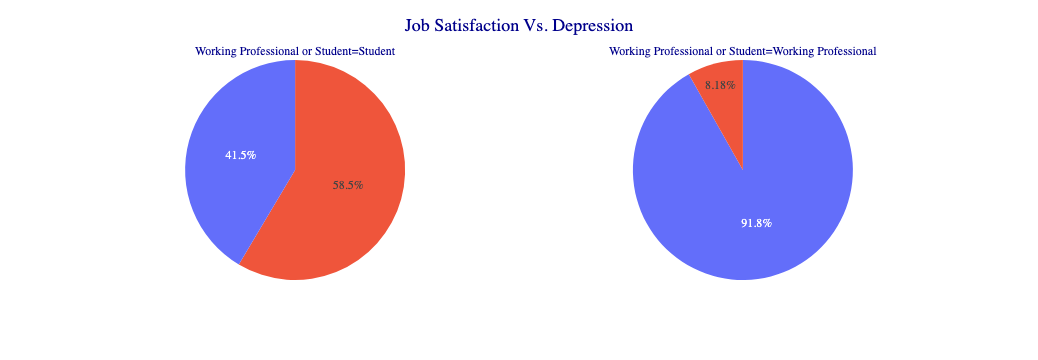

In [745]:
 # the code for this pie chart uses the Working Professional or Student variable and compares it to depression, but it is mostly 
# the same as the previous charts

#sorts the data by working professional or student and depression so that they both appear in the proper

DF_Student_Vs_Job = (
DF.value_counts(subset=['Working Professional or Student', 'Depression']).reset_index(name='count').sort_values(by=['Working Professional or Student', 'Depression'], ascending=[True, True])
     

)

fig3 = px.pie(DF_Student_Vs_Job, 
    values = 'count',
    facet_col='Working Professional or Student',
    color = 'Depression',
    category_orders={'Depression': [0, 1]},
)


fig3.update_layout(

    title={
        'font': dict(size=18),
        'text': "Job Satisfaction Vs. Depression", 
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
    },
        font={'family':"Times",'size':12,'color':"Darkblue"}
)
fig3.show()

    The workers are on the left, while the students are on the right. As you can very clearly see here, the depression rates are much higher in the participants that were students. This ratio is much higher than I could've ever anticipated, and I think that it is very likely the most influencial variable for depression among those in this data set.

In [ ]:
DF_Depression_Influence = (
DF.value_counts(subset=['Financial Stress', 'Depression']).reset_index(name='count').sort_values(by='Financial Stress', ascending=True)

)

fig3 = px.pie(DF_Depression_Influence, 
    values='count', 
    facet_col='Financial Stress',
    color = 'Depression',
    facet_col_wrap = 5,
    category_orders={'Depression' : [1,0]},
   
)


fig3.update_layout(
                  width=900,
                  height=300,
    title={
        'font': dict(size=18),
        'text': "Financial Stress Vs. Depression",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Adjust vertical position (closer to top)
    },
        font={'family':"Times",'size':12,'color':"Darkblue"}
                      
)

fig3.show()

### How does age influence depression

In [457]:
show(DF)

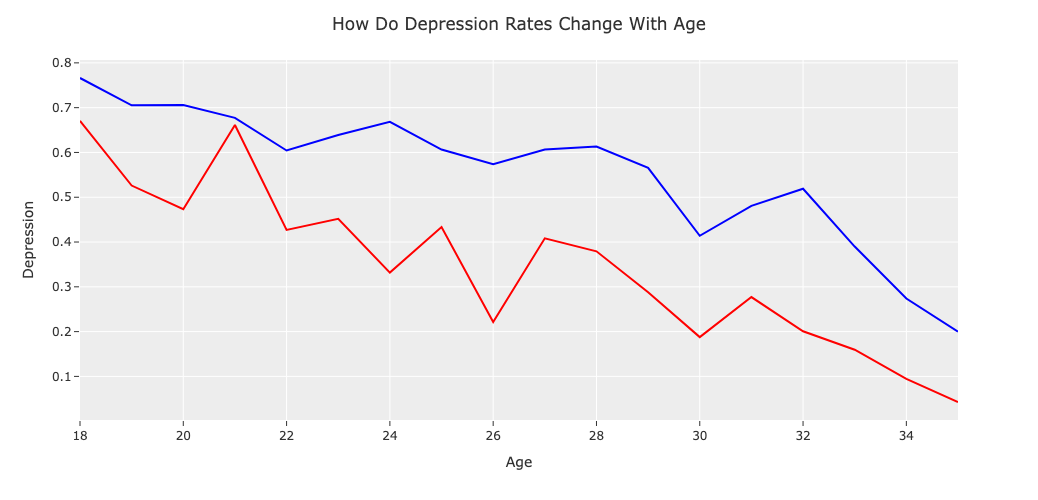

In [585]:
# creating data frame for the line that works with students

# create new empty data frame in order to next fill it with columns from the origonal data frame
DF_age_with_students = pd.DataFrame()

# moving over columns from the original data frame to the new one, specifically the columns depression, age, and family history
# of mental illnesses
DF_age_with_students['Depression'] = DF['Depression']
DF_age_with_students['Age'] = DF['Age']
DF_age_with_students['Working Professional or Student'] = DF['Working Professional or Student']

#series of masks. First mask filters out only the students for this data frame
mask = (DF_age_with_students['Working Professional or Student'] == "Student")
# this applies the mask
DF_age_with_students = DF_age_with_students[mask]
# deletes that column since we don't use it and it gets in the way
del DF_age_with_students['Working Professional or Student']
# masking to avoid ages above 35, since there are only a couple data points there and it throws off the data
mask = (DF_age_with_students['Age'] <= 35)
#applying mask
DF_age_with_students = DF_age_with_students[mask]


#creating first graph with students
DF_age_with_students = DF_age_with_students.groupby('Age').mean().reset_index()
fig_students = px.line(DF_age_with_students, 
    x = 'Age',
    y = 'Depression'
)

fig_students.update_layout(
                  title='How Do Depression Rates Change With Age',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )
fig_students.update_traces(name="Students", line=dict(color='blue'))

#creating second line for workers
# create new empty data frame in order to next fill it with columns from the origonal data frame
DF_age_with_workers = pd.DataFrame()

# moving over columns from the original data frame to the new one, specifically the columns depression, age, and family history
# of mental illnesses
DF_age_with_workers['Depression'] = DF['Depression']
DF_age_with_workers['Age'] = DF['Age']
DF_age_with_workers['Working Professional or Student'] = DF['Working Professional or Student']

mask = (DF_age_with_workers['Working Professional or Student'] == "Working Professional")
DF_age_with_workers = DF_age_with_workers[mask]
del DF_age_with_workers['Working Professional or Student']
mask = (DF_age_with_workers['Age'] <= 35)
DF_age_with_workers = DF_age_with_workers[mask]


DF_age_with_workers = DF_age_with_workers.groupby('Age').mean().reset_index()
fig_workers = px.line(DF_age_with_workers, 
    x = 'Age',
    y = 'Depression'
)
fig_workers.update_traces(name="Workers", line=dict(color='red'))


fig_students.add_traces(fig_workers.data)
fig_students.update_layout(
    title='How Do Depression Rates Change With Age',
    template='ggplot2',
    width=800,
    height=500,
    legend_title="Group", 
    legend=dict(x=0.8, y=1.0)
)
fig_students.show()


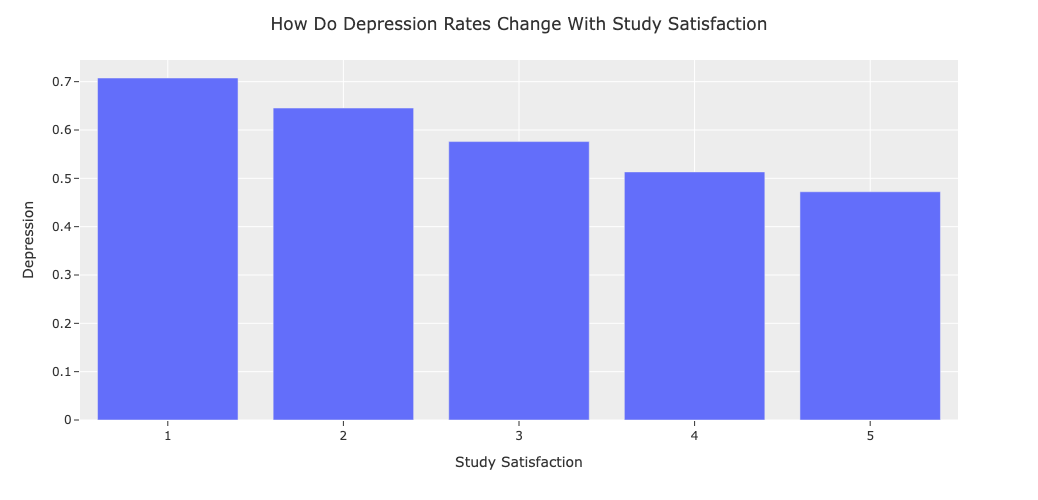

In [624]:
DF_Study_Satisfaction = pd.DataFrame()

DF_Study_Satisfaction['Depression'] = DF['Depression']
DF_Study_Satisfaction['Study Satisfaction'] = DF['Study Satisfaction']
DF_Study_Satisfaction['Working Professional or Student'] = DF['Working Professional or Student']

#series of masks. First mask filters out only the students for this data frame
mask = (DF_Study_Satisfaction['Working Professional or Student'] == "Student")
# this applies the mask
DF_Study_Satisfaction = DF_Study_Satisfaction[mask]
# deletes that column since we don't use it and it gets in the way
del DF_Study_Satisfaction['Working Professional or Student']
# masking to avoid ages above 35, since there are only a couple data points there and it throws off the data
mask = (DF_Study_Satisfaction['Study Satisfaction'] <= 35)
#applying mask
DF_Study_Satisfaction = DF_Study_Satisfaction[mask]


#creating first graph with students
DF_Study_Satisfaction = DF_Study_Satisfaction.groupby('Study Satisfaction').mean().reset_index()
show(DF_Study_Satisfaction)
fig_students = px.bar(DF_Study_Satisfaction, 
    x = 'Study Satisfaction',
    y = 'Depression'
)

fig_students.update_layout(
                  title='How Do Depression Rates Change With Study Satisfaction',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )

fig_students.show()

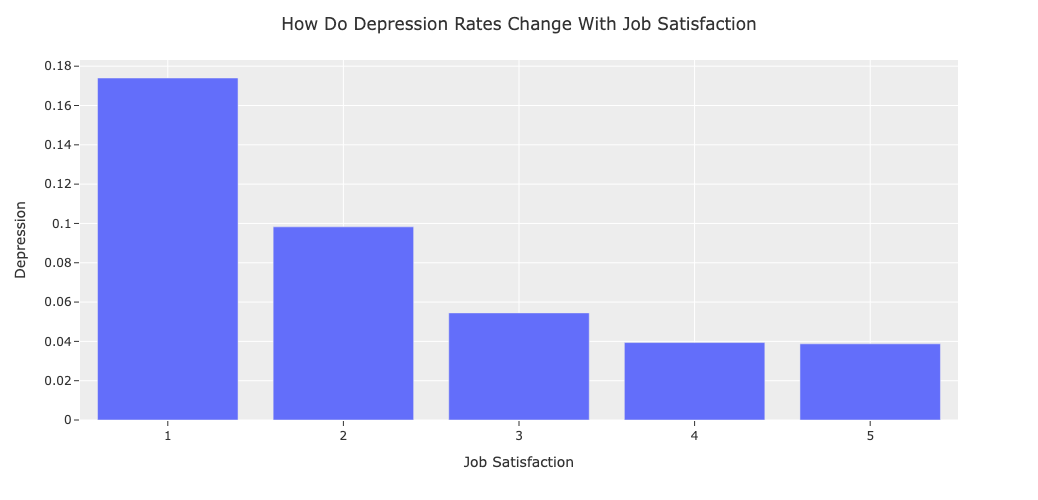

In [625]:
DF_Work_Satisfaction = pd.DataFrame()

DF_Work_Satisfaction['Depression'] = DF['Depression']
DF_Work_Satisfaction['Job Satisfaction'] = DF['Job Satisfaction']
DF_Work_Satisfaction['Working Professional or Student'] = DF['Working Professional or Student']

#series of masks. First mask filters out only the students for this data frame
mask = (DF_Work_Satisfaction['Working Professional or Student'] == "Working Professional")
# this applies the mask
DF_Work_Satisfaction = DF_Work_Satisfaction[mask]
# deletes that column since we don't use it and it gets in the way
del DF_Work_Satisfaction['Working Professional or Student']
# masking to avoid ages above 35, since there are only a couple data points there and it throws off the data
mask = (DF_Work_Satisfaction['Job Satisfaction'] <= 35)
#applying mask
DF_Work_Satisfaction = DF_Work_Satisfaction[mask]


#creating first graph with students
DF_Work_Satisfaction = DF_Work_Satisfaction.groupby('Job Satisfaction').mean().reset_index()
show(DF_Work_Satisfaction)
fig_workers = px.bar(DF_Work_Satisfaction, 
    x = 'Job Satisfaction',
    y = 'Depression'
)

fig_workers.update_layout(
                  title='How Do Depression Rates Change With Job Satisfaction',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )
fig_workers.show()

In [659]:
newvariable = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=False)
    
)

funmask = newvariable['Study Satisfaction'] != 0
df_new[mask]

show(newvariable)

In [626]:
DF

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


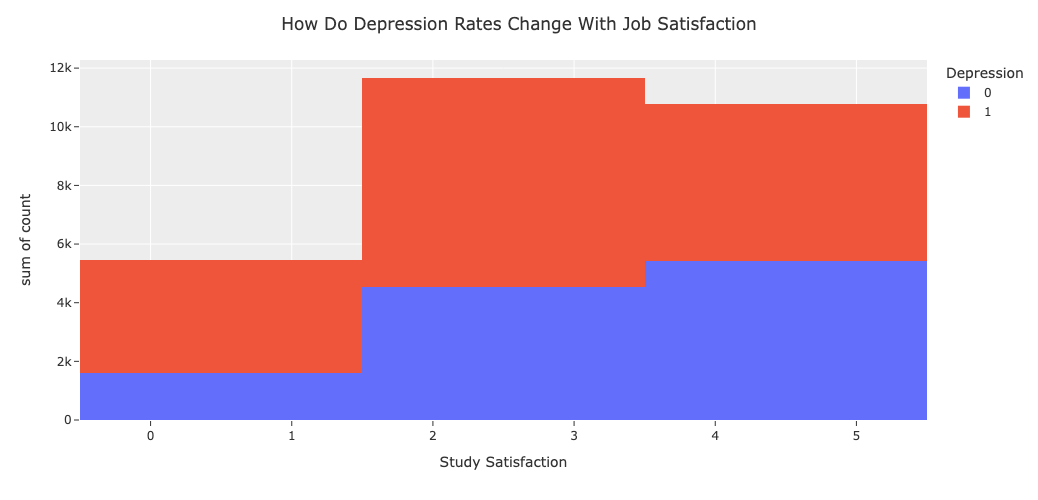

In [643]:
DF_Depression_Influence = (
DF.value_counts(subset=['Study Satisfaction', 'Depression']).reset_index(name='count').sort_values(by='Study Satisfaction', ascending=False)
) 
show(DF_Depression_Influence)
fig = px.histogram(DF_Depression_Influence,
    x = 'Study Satisfaction',
                   y = 'count',
                   color = 'Depression'
)
fig.update_layout(
                  title='How Do Depression Rates Change With Job Satisfaction',
                  template='ggplot2',
                  width=800,
                  height=500,
                      )
fig.show()

